## Extracting data 

In [ ]:
from zipfile import ZipFile
file_name= "data.zip"
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    zip.extractall()

File Name                                             Modified             Size
data/train/cats/2.jpg                          2019-05-06 02:18:24        26997
data/train/cats/5.jpg                          2019-05-06 02:18:24         5751
data/train/cats/20.jpg                         2019-05-06 02:18:24        21677
data/train/cats/3.jpg                          2019-05-06 02:18:24        37954
data/train/cats/12.jpg                         2019-05-06 02:18:18        21751
data/train/cats/16.jpg                         2019-05-06 02:18:18        22232
data/train/cats/10.jpg                         2019-05-06 02:18:18        35381
data/train/cats/18.jpg                         2019-05-06 02:18:18        30977
data/train/cats/4.jpg                          2019-05-06 02:18:18        20465
data/train/cats/14.jpg                         2019-05-06 02:18:16        16642
data/train/cats/19.jpg                         2019-05-06 02:18:16        15157
data/train/cats/15.jpg                  

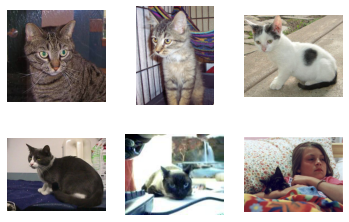

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = 'data/train/cats/'     


for i in range(1,7):
    # define subplot
    pyplot.subplot(2,3, i)
    x= folder + str(i) + '.jpg'
    # load image pixels
    image = imread(x)
   
    pyplot.axis('off')
    pyplot.imshow(image)

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils.vis_utils import plot_model


train_data_generator = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True
    )

test_data_generator = ImageDataGenerator(
    rescale = 1./255)

In [ ]:
fc_size=32
IMAGE_SHAPE = 128

training_set_data = train_data_generator.flow_from_directory(
    "/content/data/train", 
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE), 
    batch_size = 64,
    class_mode = 'binary'
)

test_set_data = test_data_generator.flow_from_directory(
    '/content/data/test',
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size = 64, 
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Data preperation

In [ ]:
input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(32, kernel_size=(5,5), activation = 'relu')(input_layer)
max_pool_1 = MaxPooling2D(pool_size=(2,2), strides=2)(convolution_layer_1)

convolution_layer_2 = Conv2D(64, kernel_size=(5,5), activation = 'relu')(max_pool_1)
max_pool_2 = MaxPooling2D(pool_size=(2,2),strides=2)(convolution_layer_2)


dense_layer_1 = Dense(fc_size, activation='relu')(max_pool_2)
flatten_layer_1 = Flatten()(dense_layer_1)
dropout_1 = Dropout(0.4)(flatten_layer_1)

output_layer = Dense(1, activation='sigmoid')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 29, 29, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0     

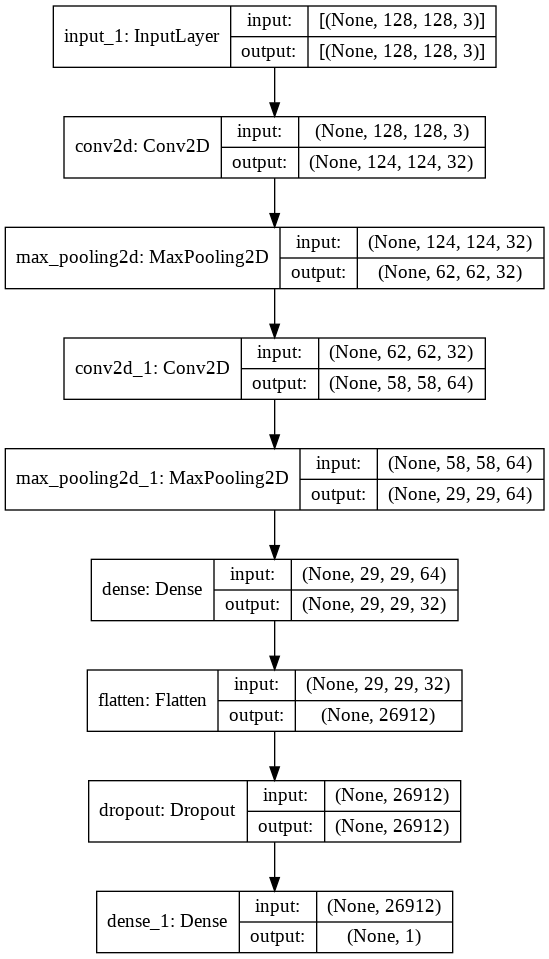

In [ ]:
plot_model(model, show_shapes=True)


In [ ]:
model.fit_generator(
    training_set_data, 
    epochs = 100, 
    validation_data = test_set_data, 
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6839 - accuracy: 0.6250 - val_loss: 0.7182 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.6850 - accuracy: 0.5750 - val_loss: 0.7232 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.7115 - accuracy: 0.5000 - val_loss: 0.7086 - val_accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.6853 - accuracy: 0.5750 - val_loss: 0.7067 - val_accuracy: 0.4500
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.6791 - accuracy: 0.5750 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.6687 - accuracy: 0.6000 - val_loss: 0.7028 - val_accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 0.6901 - accuracy: 0.5500 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 8/100
1/1 [=================

In [ ]:
model.fit_generator(
    training_set_data, 
    epochs = 200, 
    validation_data = test_set_data, 
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 2.4229 - val_accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 2.3799 - val_accuracy: 0.6000
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 2.4022 - val_accuracy: 0.6000
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 2.4635 - val_accuracy: 0.6000
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 2.5697 - val_accuracy: 0.6000
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.7050 - val_accuracy: 0.5500
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 2.8498 - val_accuracy: 0.6000
Epoch 8/200
1/1 [=================

In [ ]:
model.fit_generator(
    training_set_data, 
    epochs = 300, 
    validation_data = test_set_data, 
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 1.2732e-04 - accuracy: 1.0000 - val_loss: 4.1355 - val_accuracy: 0.6000
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 1.5459e-04 - accuracy: 1.0000 - val_loss: 4.1203 - val_accuracy: 0.6000
Epoch 3/300
1/1 [==============================] - 2s 2s/step - loss: 1.7817e-04 - accuracy: 1.0000 - val_loss: 4.1165 - val_accuracy: 0.6000
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 9.7378e-05 - accuracy: 1.0000 - val_loss: 4.1166 - val_accuracy: 0.6000
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 3.2614e-05 - accuracy: 1.0000 - val_loss: 4.1180 - val_accuracy: 0.6000
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 2.9002e-05 - accuracy: 1.0000 - val_loss: 4.1210 - val_accuracy: 0.6000
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 5.4892e-04 - accuracy: 1.0000 - val_loss: 4.1248 - val_accuracy: 0.6000
Epoch 

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt


[[4.2902798e-08]]
Model : It's a CAT


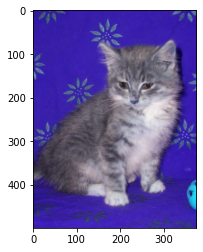

In [ ]:
TEST_PATH = "/content/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_dog_img = test_dogs_images[9]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "cats/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

print (prediction)
if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

[[0.9824612]]
Model : It's a DOG


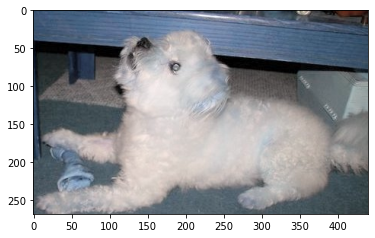

In [ ]:
TEST_PATH = "/content/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[4]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)
print (prediction)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")